# ExtraTreesClassifier

In [1]:
from __future__      import division
from IPython.display import display
from matplotlib      import pyplot as plt
%matplotlib inline

import numpy  as np
import pandas as pd
import random, sys, os

from sklearn.ensemble         import ExtraTreesClassifier

from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search      import RandomizedSearchCV, GridSearchCV

In [2]:
SEED   = 97
scale  = False 
minmax = False
norm   = False
nointercept = False

submission_filename = "../submissions/submission_ExtraTreesClassifier.csv"

# Load the training data

In [3]:
from load_blood_data import load_blood_data

y_train, X_train = load_blood_data(train=True, SEED   = SEED, 
                                               scale  = scale,
                                               minmax = minmax,
                                               norm   = norm,
                                               nointercept = nointercept)

# Train the model

In [4]:
%%time

random.seed(SEED)

clf = ExtraTreesClassifier(n_estimators             = 10, 
                           criterion                = 'gini', 
                           max_depth                = None, 
                           bootstrap                = True, 
                           max_features             = 'auto',
                           
                           min_samples_split        = 2, 
                           min_samples_leaf         = 1, 
                           #min_weight_fraction_leaf = 0.0, 
                            
                           max_leaf_nodes           = None, 
                           oob_score                = False, 
                           n_jobs                   = -1, 
                           random_state             = SEED, 
                           verbose                  = 0) 
                           #warm_start               = False, 
                           #class_weight             = None)



# StatifiedCV = StratifiedKFold(y            = y_train, 
#                               n_folds      = 10, 
#                               shuffle      = True, 
#                               random_state = SEED)

# param_grid = dict(n_estimators     = [5, 10, 50, 75],
#                   criterion        = ['entropy', 'gini'],
#                   max_depth        = [None, 1, 3, 7, 9, 11],
#                   #bootstrap        = [True, False],
#                   max_features     = ['sqrt', 'log2', None])

# grid_clf = GridSearchCV(estimator  = clf, 
#                         param_grid = param_grid,
#                         n_jobs     = -1,  
#                         cv         = StatifiedCV,
#                         verbose    = 0
#                        )

# grid_clf.fit(X = X_train, y = y_train)

# print("svc_params = {}".format(grid_clf.best_params_))
# print("score: {}".format(round(grid_clf.best_score_, 4)))
# print

# clf = grid_clf.best_estimator_




svc_params = {'max_features': None, 'n_estimators': 10, 'criterion': 'entropy', 'max_depth': 7}
clf.set_params(**svc_params)
clf.fit(X_train, y_train)

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 134 ms


In [5]:
# from sklearn_utilities import GridSearchHeatmap

# GridSearchHeatmap(grid_clf, y_key='learning_rate', x_key='n_estimators')

# from sklearn_utilities import plot_validation_curves

# plot_validation_curves(grid_clf, param_grid, X_train, y_train, ylim = (0.0, 1.05))

/home/george/.local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


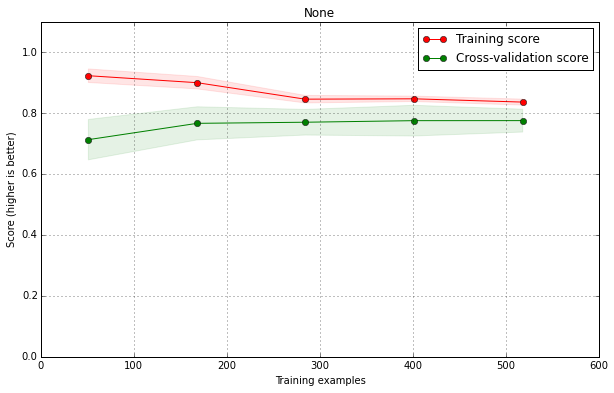

CPU times: user 252 ms, sys: 40 ms, total: 292 ms
Wall time: 2.8 s


In [6]:
%%time

try:
    from sklearn_utilities import plot_learning_curve
except:
    import imp, os
    util = imp.load_source('sklearn_utilities', os.path.expanduser('~/Dropbox/Python/sklearn_utilities.py'))
    from sklearn_utilities import plot_learning_curve

plot_learning_curve(estimator   = clf, 
                    title       = None, 
                    X           = X_train, 
                    y           = y_train, 
                    ylim        = (0.0, 1.10), 
                    cv          = StratifiedKFold(y            = y_train, 
                                                  n_folds      = 10, 
                                                  shuffle      = True, 
                                                  random_state = SEED), 
                    train_sizes = np.linspace(.1, 1.0, 5),
                    n_jobs      = -1)

plt.show()

# Training set predictions

In [7]:
predicted_values = clf.predict(X_train)
y_true, y_pred   = y_train, predicted_values

predicted_probs  = clf.predict_proba(X_train)

[[422  16]
 [ 75  63]]


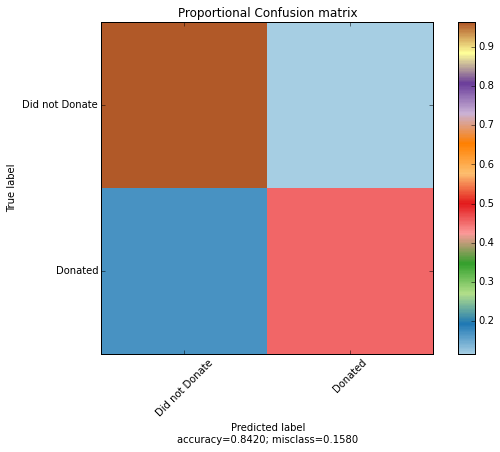

Accuracy 0.842, mis-class rate 0.158


In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred, labels=None)
print cm

try:
    from sklearn_utilities import plot_confusion_matrix
except:
    import imp, os
    util = imp.load_source('sklearn_utilities', os.path.expanduser('~/Dropbox/Python/sklearn_utilities.py'))
    from sklearn_utilities import plot_confusion_matrix

plot_confusion_matrix(cm, ['Did not Donate','Donated'])

accuracy = round(np.trace(cm)/float(np.sum(cm)),4)
misclass = 1 - accuracy
print("Accuracy {}, mis-class rate {}".format(accuracy,misclass))

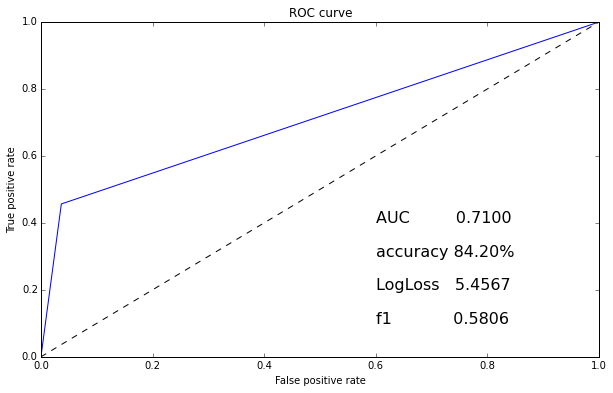

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score

fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=None)


plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.text(x=0.6,y=0.4,s="AUC         {:.4f}"\
         .format(roc_auc_score(y_true, y_pred, average='macro')),
        fontsize=16)

plt.text(x=0.6,y=0.3,s="accuracy {:.2f}%"\
         .format(accuracy*100),
        fontsize=16)

plt.text(x=0.6,y=0.2,s="LogLoss   {:.4f}"\
         .format(log_loss(y_true, y_pred)),
        fontsize=16)

plt.text(x=0.6,y=0.1,s="f1            {:.4f}"\
         .format(f1_score(y_true, y_pred)),
        fontsize=16)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

# --------------------------------------------------------------------------------------------

# Test Set Predictions

## Load the test data

In [10]:
from load_blood_data import load_blood_data

X_test, IDs = load_blood_data(train=False, SEED   = SEED, 
                                           scale  = scale,
                                           minmax = minmax,
                                           norm   = norm,
                                           nointercept = nointercept)

# Predict the test set with the fitted model

In [11]:
y_pred        = clf.predict(X_test)
y_pred_probs  = clf.predict_proba(X_test)
donate_probs  = [prob[1] for prob in y_pred_probs]

In [12]:
print(y_pred[:10])
print(y_pred_probs[:10])
print(donate_probs[:10])

[1 0 0 0 1 1 0 0 0 0]
[[ 0.49742576  0.50257424]
 [ 0.82213076  0.17786924]
 [ 0.84437659  0.15562341]
 [ 0.67903268  0.32096732]
 [ 0.48964073  0.51035927]
 [ 0.15172132  0.84827868]
 [ 0.7882436   0.2117564 ]
 [ 0.94861556  0.05138444]
 [ 0.9         0.1       ]
 [ 0.94699679  0.05300321]]
[0.50257423574132898, 0.17786923602713078, 0.15562340987952716, 0.32096731723842065, 0.51035926592189285, 0.84827867541193425, 0.21175639828331358, 0.051384435796905811, 0.10000000000000001, 0.053003211210042332]


# Create the submission file

In [13]:
assert len(IDs)==len(donate_probs)

f = open(submission_filename, "w")

f.write(",Made Donation in March 2007\n")
for ID, prob in zip(IDs, donate_probs):
    f.write("{},{}\n".format(ID,prob))
    
f.close()